# Домашняя работа 4

In [1]:
import sympy as sym
import numpy as np
from IPython.display import display

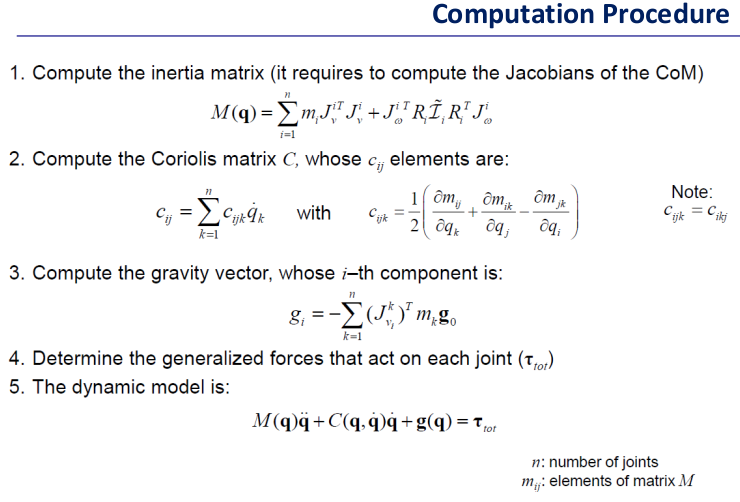

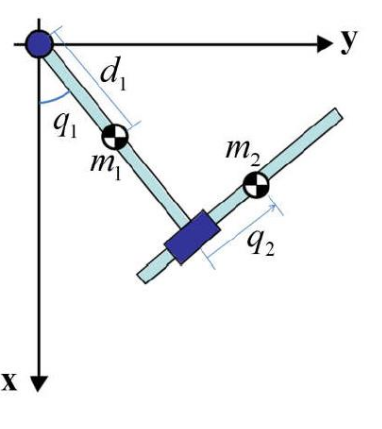

## Задаем переменные

In [2]:
q1, q2 = sym.symbols('q1 q2')
q = sym.Matrix([q1, q2])

dq1, dq2 = sym.symbols('dq1 dq2')
dq = sym.Matrix([dq1, dq2])

d1, l1 = sym.symbols('d1 l1')
m1, m2 = sym.symbols('m1 m2')
Ixx, Ixy, Ixz, Iyy, Iyz, Izz = sym.symbols('Ixx Ixy Ixz Iyy Iyz Izz')

I = sym.Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
I1 = I2 = I

g = sym.symbols('g')
display(I)


Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

## Координаты каждого звена

In [3]:
x1 = d1 * sym.cos(q1)
y1 = d1 * sym.sin(q1)
x2 = l1 * sym.cos(q1) - q2 * sym.sin(q1)
y2 = l1 * sym.sin(q1) + q2 * sym.cos(q1)

In [4]:
display(x1)
display(y1)
display(x2)
display(y2)

d1*cos(q1)

d1*sin(q1)

l1*cos(q1) - q2*sin(q1)

l1*sin(q1) + q2*cos(q1)

## Считаем якобиан по линейной скорости

In [5]:
Jv1 = sym.Matrix([x1, y1, 0]).jacobian([q1, q2])
display(Jv1)

Matrix([
[-d1*sin(q1), 0],
[ d1*cos(q1), 0],
[          0, 0]])

In [6]:
Jv2 = sym.Matrix([x2, y2, 0]).jacobian([q1, q2])
display(Jv2)

Matrix([
[-l1*sin(q1) - q2*cos(q1), -sin(q1)],
[ l1*cos(q1) - q2*sin(q1),  cos(q1)],
[                       0,        0]])

## Считаем якобиан по угловой скорости

In [7]:
Jw1 = sym.Matrix([[0, 0], [0, 0], [1, 0]])
Jw2 = sym.Matrix([[0, 0], [0, 0], [1, 0]])
display(Jw1)
display(Jw2)

Matrix([
[0, 0],
[0, 0],
[1, 0]])

Matrix([
[0, 0],
[0, 0],
[1, 0]])

In [8]:
R1 = sym.Matrix([
    [sym.cos(q1), -sym.sin(q1), 0],
    [sym.sin(q1),  sym.cos(q1), 0],
    [0, 0, 1]
])

R2 = R1 @ sym.Matrix([
    [sym.cos(sym.pi/2), -sym.sin(sym.pi/2), 0],
    [sym.sin(sym.pi/2),  sym.cos(sym.pi/2), 0],
    [0, 0, 1]
])

R2 = sym.simplify(R2)

In [9]:
display(R1)
display(R2)

Matrix([
[cos(q1), -sin(q1), 0],
[sin(q1),  cos(q1), 0],
[      0,        0, 1]])

Matrix([
[-sin(q1), -cos(q1), 0],
[ cos(q1), -sin(q1), 0],
[       0,        0, 1]])

## Считаем инерционную матрицу

In [10]:
Mq = m1 * Jv1.T @ Jv1 + m2 * Jv2.T @ Jv2 + Jw1.T @ R1 @ I1 @ R1.T @ Jw1 + Jw2.T @ R2 @ I2 @ R2.T @ Jw2
Mq = sym.simplify(Mq)

In [11]:
display(Mq)

Matrix([
[d1**2*m1 + l1**2*m2 + m2*q2**2 + 2, l1*m2],
[                             l1*m2,    m2]])

## Считаем матрицу сил Кориолиса

In [12]:
def coriolis_matrix(Mq, q, dq):
    n = len(q)
    dM = [Mq.diff(qk) for qk in q]

    zeroM = sym.zeros(*Mq.shape)
    dq = sym.Matrix(dq)
    Mdot = sum(((dM[k] * dq[k]) for k in range(n)), zeroM)

    Xi = sym.Matrix.hstack(*[(dM[j] * dq) for j in range(n)])

    C = sym.simplify( sym.Rational(1,2) * (Mdot + Xi - Xi.T) )
    return C

In [13]:
Cq = coriolis_matrix(Mq, q, dq)
display(Cq)

Matrix([
[ dq2*m2*q2, dq1*m2*q2],
[-dq1*m2*q2,         0]])

## Считаем матрицу гравитационных сил

In [14]:
g0 = sym.Matrix([g, 0, 0])
G = - (Jv1.T @ (m1*g0) + Jv2.T @ (m2*g0))
G = sym.simplify(G)
display(G)

Matrix([
[g*(d1*m1*sin(q1) + m2*(l1*sin(q1) + q2*cos(q1)))],
[                                    g*m2*sin(q1)]])

## Выведем результат

In [15]:
display(Mq)
display(Cq)
display(G)

Matrix([
[d1**2*m1 + l1**2*m2 + m2*q2**2 + 2, l1*m2],
[                             l1*m2,    m2]])

Matrix([
[ dq2*m2*q2, dq1*m2*q2],
[-dq1*m2*q2,         0]])

Matrix([
[g*(d1*m1*sin(q1) + m2*(l1*sin(q1) + q2*cos(q1)))],
[                                    g*m2*sin(q1)]])

## Проверка

### Кососимметричность

In [18]:
Mdot = Mq.diff(q1)*dq1 + Mq.diff(q2)*dq2

test = sym.simplify(Mdot - 2*Cq)
is_skew = sym.simplify(test + test.T) == sym.zeros(*Mq.shape)

display(test)
print("Mdot - 2*Cq кососимметрична?" , is_skew)

Matrix([
[          0, -2*dq1*m2*q2],
[2*dq1*m2*q2,            0]])

Mdot - 2*Cq кососимметрична? True


### Симметричность

In [19]:
is_skew = Mq == Mq.T

print("Mq симметрична?" , is_skew)

Mq симметрична? True
